# 数据准备

## 导入库

In [27]:
import os
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split  # 数据集划分
from collections import Counter # 查看数据分布
from sklearn.preprocessing import StandardScaler   # 数据标准化
from sklearn.preprocessing import MinMaxScaler  # 数据归一化
from sklearn.feature_selection import VarianceThreshold # 方差过滤

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
np.set_printoptions(threshold=np.inf) # 打印全部np array

## 读取并合并features与labels文件

In [28]:
path_input=r"D:\FJMU_course\Chapter_8\BraTs18"
os.chdir(path_input)
os.getcwd() 

'D:\\FJMU_course\\Chapter_8\\BraTs18'

In [29]:
# 将文件读取为数据框
df_features = pd.read_csv("BraTs18_features.csv",header=0,index_col=0) # header=0：特征作为列名标题；index_col：ID作为行索引
df_labels = pd.read_csv("BraTs18_labels.csv",header=0,index_col=0)

In [30]:
# 合并DataFrames
df_merged = pd.merge(df_features, df_labels, on='ID')

# 删除并返回df_merged中的label列 --> "Ctrl + x"
label_col = df_merged.pop('label')

In [31]:
# 将label列插入到第二列的位置
df_merged.insert(0, 'label', label_col)

df_merged

,label,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_131_1,1,0.726311,0.559206,13.427198,24.011176,27.166155,25.806976,21.633308,27.331301,2973.375,...,7.310000e-05,7.310000e-05,-3.200000e-16,0.008547,0.000000e+00,0,1000000,0,0,0
TCIA01_147_1,1,0.324279,0.241640,18.391378,76.110635,34.205263,64.202804,52.392748,67.349833,3111.750,...,6.627727e-01,6.627727e-01,1.672933e+00,0.069620,8.196860e+02,0,1000000,0,0,0
TCIA01_150_1,1,0.601749,0.424471,11.765921,27.719023,18.973666,30.000000,36.249138,44.090815,1216.125,...,6.500661e-01,6.500661e-01,1.370951e+00,0.083333,4.624000e+02,0,1000000,0,0,0
TCIA01_180_1,1,0.806690,0.734958,39.131925,53.243759,59.169249,65.795137,58.249464,66.407831,51266.250,...,2.650000e-07,2.650000e-07,-3.200000e-16,0.000515,0.000000e+00,0,1000000,0,0,0
TCIA01_186_1,1,0.610774,0.510398,18.849056,36.930103,28.460499,37.107951,42.953463,45.000000,6597.000,...,6.222250e-01,6.222250e-01,1.370951e+00,0.018248,1.136416e+04,0,1000000,0,0,0
TCIA01_190_1,1,0.727245,0.527204,16.592474,31.472611,26.832816,30.594117,30.000000,37.229021,4100.625,...,5.000171e-01,5.000171e-01,1.000000e+00,0.011628,7.225000e+03,0,1000000,0,0,0
TCIA01_201_1,1,0.686297,0.590655,28.815213,48.785200,48.373546,61.773781,54.744863,63.639610,22771.125,...,8.064287e-01,8.064287e-01,1.089230e+00,0.015184,5.403827e+04,0,1000000,0,0,0
TCIA01_203_1,1,0.582279,0.486984,35.148402,72.175676,61.846584,61.188234,66.610810,66.678332,14042.250,...,5.156111e-01,5.156111e-01,2.395999e+00,0.028961,4.754249e+03,0,1000000,0,0,0
TCIA01_221_1,1,0.979729,0.760209,33.863283,44.544679,54.083269,52.478567,53.160135,54.580216,42355.125,...,3.930000e-07,3.930000e-07,-3.200000e-16,0.000627,0.000000e+00,0,1000000,0,0,0


In [32]:
# 检查合并是否正确
print(df_features.shape)
print(df_labels.shape)
print(df_merged.shape)

(60, 1967)
(60, 1)
(60, 1968)


# 数据集划分

In [33]:
# 准备特征矩阵X和目标变量Y
X = df_merged.drop('label', axis=1)  # 特征矩阵X是去除'label'列的DataFrame
Y = df_merged['label']  # 目标变量Y是'label'列

# 按照8:2比例分割数据集为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [34]:
# 打印分割后的数据集大小来验证
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (42, 1967)
x_test shape: (18, 1967)
y_train shape: (42,)
y_test shape: (18,)


In [35]:
# 查看数据分布
Counter(Y)

Counter({1: 30, 0: 30})

In [36]:
Counter(y_train)

Counter({1: 21, 0: 21})

In [37]:
# 查看数据分布
Counter(y_test)

Counter({1: 9, 0: 9})

# 数据标准化

## 方法一：分步执行训练集标准化

In [38]:
# 实例化
scaler = StandardScaler()
# 生成均值和标准差
mean_and_std = scaler.fit(x_train)

In [39]:
scaler.mean_

array([ 7.17813449e-01,  5.52015116e-01,  2.83286289e+01,  5.10305394e+01,
        4.69144837e+01,  5.78697489e+01,  5.49861567e+01,  6.20532954e+01,
        3.49900714e+04,  3.63241859e+01,  5.38166588e-01,  8.64679280e+03,
        5.31200512e-01,  3.60006429e+04,  1.52296234e+00,  2.47104097e+00,
        4.60586515e+03,  2.45251048e-02,  5.14878658e-01,  3.62148245e+00,
        3.32956497e+00,  3.02846977e-01,  1.97663663e+00,  1.95590334e+00,
        9.60619059e-01,  2.36894591e+00,  2.13563380e-01,  2.02581102e+00,
        1.13509727e-01,  1.24358359e+05,  9.89333294e-01,  1.62829017e-01,
        1.47209330e+00,  1.82130312e-02, -8.52774929e-03,  1.52695425e-02,
        7.18819810e-03,  8.22632142e-01,  7.18819810e-03,  2.64529030e-02,
        5.43512974e-03,  9.96405901e-01,  9.96405901e-01,  9.98574836e-01,
        9.97614331e-01, -3.14778031e-03,  1.12410954e-02,  7.18819810e-03,
        1.15855909e+00,  9.83336052e-01,  4.81366977e-02,  8.19757897e-01,
        9.88254986e-01,  

In [40]:
scaler.scale_

array([1.41015390e-01, 1.36863564e-01, 1.15780228e+01, 1.77287847e+01,
       1.76259490e+01, 2.24344923e+01, 2.16701176e+01, 2.26470423e+01,
       3.50224755e+04, 1.40215254e+01, 1.52332318e-01, 7.09667477e+03,
       4.92220562e-01, 3.51002932e+04, 6.07512158e-01, 4.38596774e-01,
       4.33820661e+03, 1.33359269e-01, 2.12424122e-01, 1.94345319e+00,
       7.35350759e-01, 1.17384211e-01, 5.05473810e-01, 5.22911725e-01,
       7.20772287e-01, 1.19834737e+00, 8.81782670e-02, 4.70653639e-01,
       7.10184969e-01, 1.17131579e+05, 6.33597507e-02, 1.24750077e-01,
       1.06726025e+00, 1.11661489e-01, 5.02917532e-02, 9.28068594e-02,
       4.11049467e-02, 3.70028870e-01, 4.11049467e-02, 1.28624044e-01,
       2.99623723e-02, 2.05524733e-02, 2.05524733e-02, 8.22196871e-03,
       1.37023034e-02, 1.79480529e-02, 6.62280137e-02, 4.11049467e-02,
       3.57509581e-01, 9.68840440e-02, 2.61380123e-01, 3.75631940e-01,
       7.02346856e-02, 7.15019161e-01, 2.20290857e-01, 3.34730980e-02,
      

In [41]:
# 调用transform接口，进行标准化
transformed_train_data = scaler.transform(x_train)

In [42]:
pd.DataFrame(transformed_train_data, columns=x_train.columns, index=x_train.index)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.508598,0.258641,-0.571105,-0.793121,-0.291010,-0.780445,-0.424231,-0.670807,-0.644028,-0.508900,...,0.372921,0.372921,1.511899,-0.189261,-0.264630,0.0,0.0,0.0,0.0,0.0
TCIA09_255_1,-1.247281,-0.884638,0.899611,2.192816,0.780483,2.131260,2.201986,1.928409,2.169205,0.884257,...,-0.964252,-0.964252,-1.045526,-0.338441,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA10_307_1,-0.482540,0.096755,0.282163,0.274428,0.109043,0.365437,0.511395,0.189285,0.044544,-0.000348,...,-0.964250,-0.964250,-1.045526,-0.333370,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA02_168_1,-0.105195,0.725885,0.277516,-0.147010,-0.003006,-0.113775,-0.041665,-0.240623,-0.373526,-0.162818,...,0.295504,0.295504,1.134121,-0.244456,-0.149741,0.0,0.0,0.0,0.0,0.0
TCIA01_412_1,-0.495348,0.612859,0.276745,-0.081357,0.476728,0.469847,-0.030173,0.292305,-0.280211,-0.299036,...,0.627972,0.627972,1.388552,-0.266052,-0.081860,0.0,0.0,0.0,0.0,0.0
TCIA01_221_1,1.857356,1.521181,0.478031,-0.365838,0.406718,-0.240308,-0.084264,-0.329980,0.210295,0.521879,...,-0.964251,-0.964251,-1.045526,-0.334392,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA01_150_1,-0.823062,-0.931907,-1.430530,-1.314896,-1.585209,-1.242272,-0.864648,-0.793149,-0.964351,-1.401010,...,1.348005,1.348005,0.522551,0.536884,-0.321211,0.0,0.0,0.0,0.0,0.0
TCIA01_499_1,-1.085164,-1.066074,-1.001325,-0.553997,-0.884694,-0.795416,-0.428771,-0.683567,-0.730244,-0.930705,...,0.517822,0.517822,0.767335,-0.253931,-0.260725,0.0,0.0,0.0,0.0,0.0
TCIA10_346_1,1.326750,1.209841,1.143534,0.389012,0.784689,0.410631,0.703367,0.469419,1.472217,1.147843,...,-0.964252,-0.964252,-1.045526,-0.337717,-0.322206,0.0,0.0,0.0,0.0,0.0


In [43]:
transformed_train_data.mean(axis=0)

array([ 4.59949539e-16, -8.78926561e-16,  8.98751972e-17, -3.91221447e-16,
       -1.53316513e-16,  4.86383420e-16,  2.11471052e-17, -2.11471052e-16,
        1.05735526e-17,  1.69176842e-16,  4.36159045e-16,  4.22942105e-17,
        2.22044605e-16,  5.28677631e-17,  3.70074342e-17,  9.25185854e-16,
       -6.34413157e-17,  2.64338815e-18,  6.60847038e-18, -2.64999662e-16,
       -6.66133815e-16,  7.93016446e-17,  1.61246677e-16, -4.98278667e-16,
       -1.79750394e-16,  2.11471052e-16, -5.76258618e-16, -4.75809868e-17,
       -2.31296463e-18,  1.37456184e-16, -1.12079658e-15, -4.62592927e-17,
       -8.45884209e-17, -1.58603289e-17,  2.57730345e-17,  9.25185854e-18,
        9.91270558e-18, -2.11471052e-17,  9.91270558e-18, -2.18079523e-17,
        9.25185854e-18,  3.77013235e-15,  3.77013235e-15, -9.64638422e-15,
       -1.18304837e-14,  2.18079523e-17, -1.32169408e-17,  9.91270558e-18,
        4.96956973e-16, -2.42993456e-15, -1.05735526e-17, -7.40148683e-17,
        1.54572122e-15,  

In [44]:
transformed_train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

## 方法二：合并执行训练集标准化 


In [45]:
# 实例化
scaler = StandardScaler()
# 生成均值和标准差
transformed_train_data = scaler.fit_transform(x_train)

In [46]:
# 将NumPy数组转换回DataFrame，重新指定列名
pd.DataFrame(transformed_train_data, columns=x_train.columns, index=x_train.index)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.508598,0.258641,-0.571105,-0.793121,-0.291010,-0.780445,-0.424231,-0.670807,-0.644028,-0.508900,...,0.372921,0.372921,1.511899,-0.189261,-0.264630,0.0,0.0,0.0,0.0,0.0
TCIA09_255_1,-1.247281,-0.884638,0.899611,2.192816,0.780483,2.131260,2.201986,1.928409,2.169205,0.884257,...,-0.964252,-0.964252,-1.045526,-0.338441,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA10_307_1,-0.482540,0.096755,0.282163,0.274428,0.109043,0.365437,0.511395,0.189285,0.044544,-0.000348,...,-0.964250,-0.964250,-1.045526,-0.333370,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA02_168_1,-0.105195,0.725885,0.277516,-0.147010,-0.003006,-0.113775,-0.041665,-0.240623,-0.373526,-0.162818,...,0.295504,0.295504,1.134121,-0.244456,-0.149741,0.0,0.0,0.0,0.0,0.0
TCIA01_412_1,-0.495348,0.612859,0.276745,-0.081357,0.476728,0.469847,-0.030173,0.292305,-0.280211,-0.299036,...,0.627972,0.627972,1.388552,-0.266052,-0.081860,0.0,0.0,0.0,0.0,0.0
TCIA01_221_1,1.857356,1.521181,0.478031,-0.365838,0.406718,-0.240308,-0.084264,-0.329980,0.210295,0.521879,...,-0.964251,-0.964251,-1.045526,-0.334392,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA01_150_1,-0.823062,-0.931907,-1.430530,-1.314896,-1.585209,-1.242272,-0.864648,-0.793149,-0.964351,-1.401010,...,1.348005,1.348005,0.522551,0.536884,-0.321211,0.0,0.0,0.0,0.0,0.0
TCIA01_499_1,-1.085164,-1.066074,-1.001325,-0.553997,-0.884694,-0.795416,-0.428771,-0.683567,-0.730244,-0.930705,...,0.517822,0.517822,0.767335,-0.253931,-0.260725,0.0,0.0,0.0,0.0,0.0
TCIA10_346_1,1.326750,1.209841,1.143534,0.389012,0.784689,0.410631,0.703367,0.469419,1.472217,1.147843,...,-0.964252,-0.964252,-1.045526,-0.337717,-0.322206,0.0,0.0,0.0,0.0,0.0


## 逆转标准化

In [47]:
original_data = scaler.inverse_transform(transformed_train_data)

In [48]:
pd.DataFrame(original_data, columns=x_train.columns, index=x_train.index)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.789534,0.587414,21.716365,36.969463,41.785165,40.360872,45.793013,46.861498,12434.625,29.188631,...,3.759320e-01,3.759320e-01,2.235926e+00,0.014403,2.674653e+04,0.0,1000000.0,0.0,0.0,0.0
TCIA09_255_1,0.541928,0.430940,38.744344,89.906504,60.671245,105.683490,102.703457,105.726061,110961.000,48.722823,...,5.870000e-08,5.870000e-08,-4.440892e-16,0.000242,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
TCIA10_307_1,0.649768,0.565257,31.595522,55.895811,48.836462,66.068147,66.068147,66.340033,36550.125,36.319306,...,5.240000e-07,5.240000e-07,-4.440892e-16,0.000724,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
TCIA02_168_1,0.702979,0.651362,31.541715,48.424228,46.861498,55.317267,54.083269,56.603887,21908.250,34.041230,...,3.541668e-01,3.541668e-01,1.905639e+00,0.009164,8.011686e+04,0.0,1000000.0,0.0,0.0,0.0
TCIA01_412_1,0.647962,0.635893,31.532783,49.588173,55.317267,68.410526,54.332311,68.673139,25176.375,32.131243,...,4.476368e-01,4.476368e-01,2.128085e+00,0.007114,1.116502e+05,0.0,1000000.0,0.0,0.0,0.0
TCIA01_221_1,0.979729,0.760209,33.863283,44.544679,54.083269,52.478567,53.160135,54.580216,42355.125,43.641723,...,3.930000e-07,3.930000e-07,-4.440892e-16,0.000627,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0
TCIA01_150_1,0.601749,0.424471,11.765921,27.719023,18.973666,30.000000,36.249138,44.090815,1216.125,16.679894,...,6.500661e-01,6.500661e-01,1.370951e+00,0.083333,4.624000e+02,0.0,1000000.0,0.0,0.0,0.0
TCIA01_499_1,0.564789,0.406108,16.735262,41.208849,31.320920,40.024992,45.694639,46.572524,9415.125,23.274286,...,4.166692e-01,4.166692e-01,1.584963e+00,0.008264,2.856067e+04,0.0,1000000.0,0.0,0.0,0.0
TCIA10_346_1,0.904906,0.717598,41.568493,57.927251,60.745370,67.082039,70.228199,72.684249,86550.750,52.418697,...,9.670000e-08,9.670000e-08,-4.440892e-16,0.000311,0.000000e+00,0.0,1000000.0,0.0,0.0,0.0


In [49]:
pd.DataFrame(x_train)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.789534,0.587414,21.716365,36.969463,41.785165,40.360872,45.793013,46.861498,12434.625,29.188631,...,3.759320e-01,3.759320e-01,2.235926e+00,0.014403,2.674653e+04,0,1000000,0,0,0
TCIA09_255_1,0.541928,0.430940,38.744344,89.906504,60.671245,105.683490,102.703457,105.726061,110961.000,48.722823,...,5.870000e-08,5.870000e-08,-3.200000e-16,0.000242,0.000000e+00,0,1000000,0,0,0
TCIA10_307_1,0.649768,0.565257,31.595522,55.895811,48.836462,66.068147,66.068147,66.340033,36550.125,36.319306,...,5.240000e-07,5.240000e-07,-3.200000e-16,0.000724,0.000000e+00,0,1000000,0,0,0
TCIA02_168_1,0.702979,0.651362,31.541715,48.424228,46.861498,55.317267,54.083269,56.603887,21908.250,34.041230,...,3.541668e-01,3.541668e-01,1.905639e+00,0.009164,8.011686e+04,0,1000000,0,0,0
TCIA01_412_1,0.647962,0.635893,31.532783,49.588173,55.317267,68.410526,54.332311,68.673139,25176.375,32.131243,...,4.476368e-01,4.476368e-01,2.128085e+00,0.007114,1.116502e+05,0,1000000,0,0,0
TCIA01_221_1,0.979729,0.760209,33.863283,44.544679,54.083269,52.478567,53.160135,54.580216,42355.125,43.641723,...,3.930000e-07,3.930000e-07,-3.200000e-16,0.000627,0.000000e+00,0,1000000,0,0,0
TCIA01_150_1,0.601749,0.424471,11.765921,27.719023,18.973666,30.000000,36.249138,44.090815,1216.125,16.679894,...,6.500661e-01,6.500661e-01,1.370951e+00,0.083333,4.624000e+02,0,1000000,0,0,0
TCIA01_499_1,0.564789,0.406108,16.735262,41.208849,31.320920,40.024992,45.694639,46.572524,9415.125,23.274286,...,4.166692e-01,4.166692e-01,1.584963e+00,0.008264,2.856067e+04,0,1000000,0,0,0
TCIA10_346_1,0.904906,0.717598,41.568493,57.927251,60.745370,67.082039,70.228199,72.684249,86550.750,52.418697,...,9.670000e-08,9.670000e-08,-3.200000e-16,0.000311,0.000000e+00,0,1000000,0,0,0


## 通过训练集的均值和标准差标准化测试集数据

In [50]:
# 实例化
scaler = StandardScaler()

# 生成训练集的均值和标准差
mean_and_std = scaler.fit(x_train)

# 使用训练集的均值和标准差来标准化测试集
transformed_test_data = scaler.transform(x_test)

In [52]:
pd.DataFrame(transformed_test_data, columns=x_test.columns, index=x_test.index)

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,gradient_glszm_SmallAreaHighGrayLevelEmphasis,gradient_glszm_SmallAreaLowGrayLevelEmphasis,gradient_glszm_ZoneEntropy,gradient_glszm_ZonePercentage,gradient_glszm_ZoneVariance,gradient_ngtdm_Busyness,gradient_ngtdm_Coarseness,gradient_ngtdm_Complexity,gradient_ngtdm_Contrast,gradient_ngtdm_Strength
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_411_1,-2.128086,-2.186563,-2.134456,-2.071477,-1.980857,-2.280486,-1.983661,-2.178005,-0.998882,-2.164413,...,-0.821974,-0.821974,-1.045526,1.765912,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA01_429_1,1.268189,0.994203,-0.666989,-1.189216,-0.721052,-0.867013,-0.922950,-1.043604,-0.813344,-0.675541,...,0.150785,0.150785,1.242049,-0.179544,-0.299714,0.0,0.0,0.0,0.0,0.0
TCIA09_620_1,0.860532,0.670968,-1.373611,-1.789890,-1.626363,-1.633937,-1.539117,-1.766583,-0.962327,-1.435655,...,1.407404,1.407404,0.004810,0.185733,-0.320652,0.0,0.0,0.0,0.0,0.0
TCIA10_261_1,-0.132397,-0.569241,1.165502,2.097348,1.552372,1.786500,1.709313,1.639435,3.212246,1.807937,...,-0.964252,-0.964252,-1.045526,-0.339057,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA01_231_1,-0.610916,-1.700427,-1.502427,-0.946891,-0.508747,-1.054826,-1.421284,-0.848001,-0.912698,-1.047952,...,-0.852980,-0.852980,0.098262,-0.175095,-0.314585,0.0,0.0,0.0,0.0,0.0
TCIA01_401_1,-1.688466,-0.702324,-0.620352,-0.262082,-0.985360,-0.374088,-0.479368,-0.535317,-0.673837,-1.003676,...,-0.964234,-0.964234,-1.045526,-0.316996,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA02_151_1,1.121637,0.578426,-0.502482,-0.866715,-0.508747,-0.820652,-0.690405,-0.894957,-0.505260,-0.362481,...,-0.964244,-0.964244,-1.045526,-0.324860,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA10_276_1,0.534568,0.941030,-0.409165,-0.923842,-0.584072,-0.573659,-0.732388,-0.748593,-0.611359,-0.630346,...,-0.964239,-0.964239,-1.045526,-0.320734,-0.322206,0.0,0.0,0.0,0.0,0.0
TCIA09_428_1,-0.996084,-4.033324,-2.446759,-2.487612,-2.321264,-2.280486,-2.260539,-2.443811,-0.997983,-2.305326,...,-0.569035,-0.569035,-1.045526,3.170515,-0.322206,0.0,0.0,0.0,0.0,0.0


## Bonus: Standardization VS. Normalization Demo

In [26]:
import matplotlib.pyplot as plt # 绘图
from scipy.stats import norm # 正态分布概率密度计算

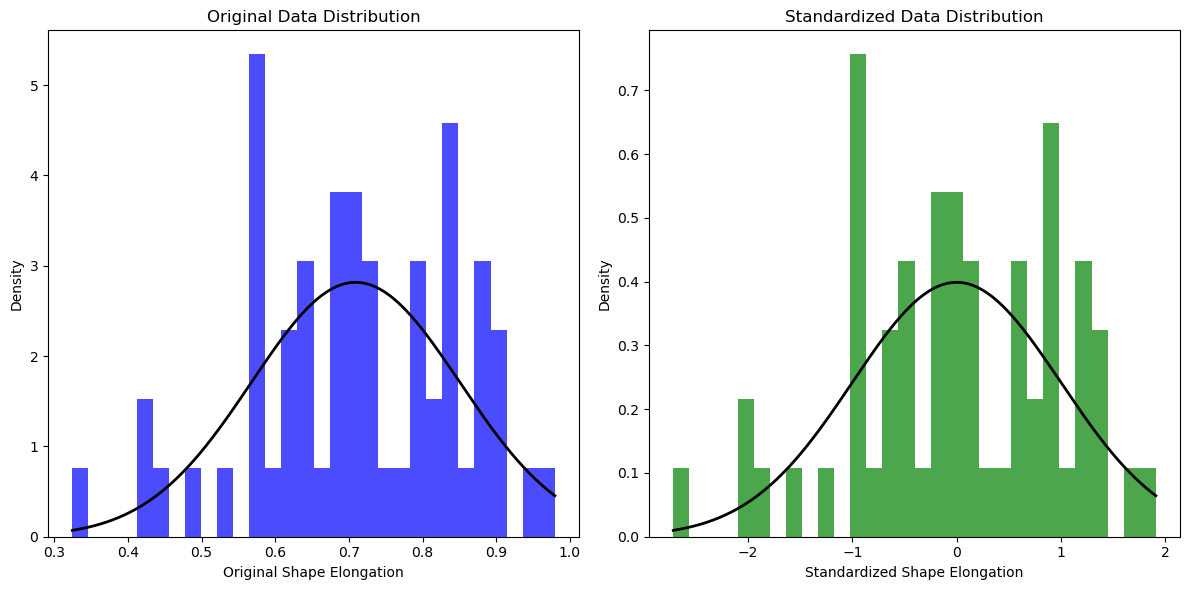

In [27]:
# 提取original_shape_Elongation列
elongation = df_merged['original_shape_Elongation'].values.reshape(-1, 1)  # 重塑为二维矩阵

# 实例化
scaler = StandardScaler()

# 对数据进行Z-score标准化
elongation_standardized = scaler.fit_transform(elongation).flatten()  # 扁平为一维数组

# 计算正态分布曲线的参数
x = np.linspace(min(elongation), max(elongation), 1000)
y = norm.pdf(x, np.mean(elongation), np.std(elongation))

x_standardized = np.linspace(min(elongation_standardized), max(elongation_standardized), 1000)
y_standardized = norm.pdf(x_standardized, 0, 1)  # 标准化数据的均值为0，标准差为1

# 绘制原始数据的直方图和正态分布曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(elongation.flatten(), bins=30, alpha=0.7, color='blue', density=True)
plt.plot(x, y, 'k-', linewidth=2)
plt.title('Original Data Distribution')
plt.xlabel('Original Shape Elongation')
plt.ylabel('Density')

# 绘制标准化后的数据直方图和正态分布曲线
plt.subplot(1, 2, 2)
plt.hist(elongation_standardized, bins=30, alpha=0.7, color='green', density=True)
plt.plot(x_standardized, y_standardized, 'k-', linewidth=2)
plt.title('Standardized Data Distribution')
plt.xlabel('Standardized Shape Elongation')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

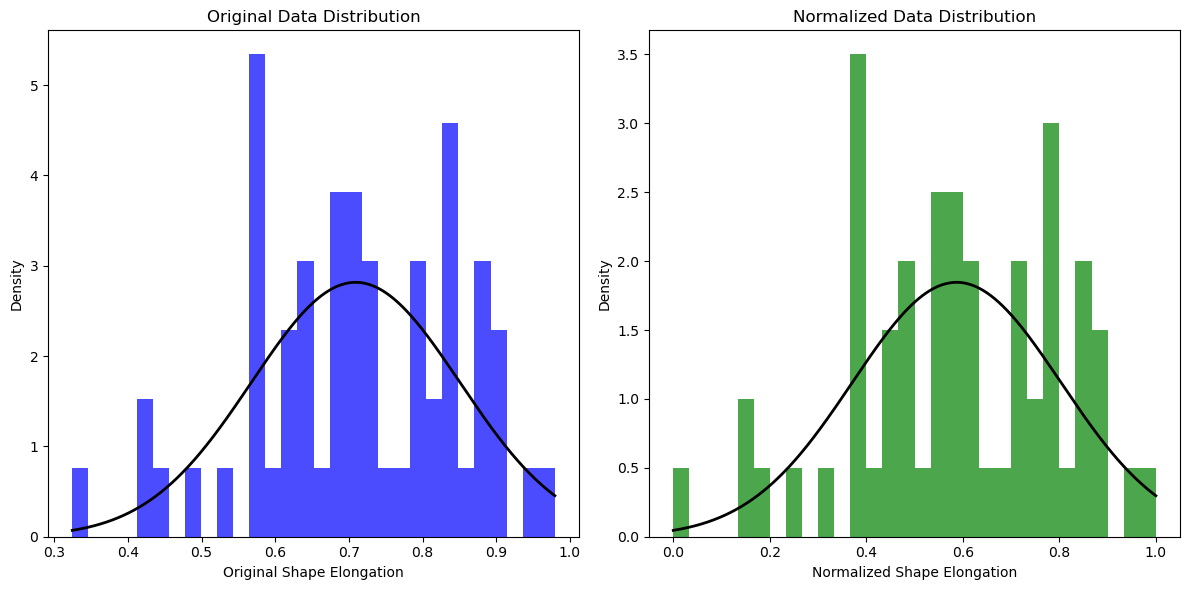

In [28]:
# 提取original_shape_Elongation列
elongation = df_merged['original_shape_Elongation'].values.reshape(-1, 1)  # 重塑为二维矩阵

# 对数据进行最小-最大归一化
scaler = MinMaxScaler()
elongation_normalized = scaler.fit_transform(elongation).flatten()  # 扁平为一维数组

# 计算正态分布曲线的参数
x_orig = np.linspace(min(elongation), max(elongation), 1000)
y_orig = norm.pdf(x_orig, np.mean(elongation), np.std(elongation))

x_norm = np.linspace(min(elongation_normalized), max(elongation_normalized), 1000)
y_norm = norm.pdf(x_norm, np.mean(elongation_normalized), np.std(elongation_normalized))

# 绘制原始数据的直方图和正态分布曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(elongation, bins=30, alpha=0.7, color='blue', density=True)
plt.plot(x_orig, y_orig, 'k-', linewidth=2)
plt.title('Original Data Distribution')
plt.xlabel('Original Shape Elongation')
plt.ylabel('Density')

# 绘制归一化后的数据直方图和正态分布曲线
plt.subplot(1, 2, 2)
plt.hist(elongation_normalized, bins=30, alpha=0.7, color='green', density=True)
plt.plot(x_norm, y_norm, 'k-', linewidth=2)
plt.title('Normalized Data Distribution')
plt.xlabel('Normalized Shape Elongation')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# 特征间的方差 & 相关性过滤

## 特征间的方差过滤

In [29]:
var_selector = VarianceThreshold(1)
var_filtered = var_selector.fit_transform(transformed_train_data)

In [30]:
var_filtered.shape

(42, 559)

In [55]:
# 获取保留特征的布尔数组
# var_selector.get_support可以指示那些特征被保留了
features = var_selector.get_support(indices=True)

# 使用保留的特征列名和原始行索引创建新的DataFrame
var_filtered_df = pd.DataFrame(var_filtered, columns=x_train.columns[features], index=x_train.index)

var_filtered_df

,original_shape_Elongation,original_shape_Maximum2DDiameterSlice,original_firstorder_10Percentile,original_firstorder_Energy,original_firstorder_Maximum,original_firstorder_Median,original_firstorder_Range,original_glcm_Contrast,original_glcm_DifferenceAverage,original_glcm_DifferenceEntropy,...,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Contrast,gradient_firstorder_10Percentile,gradient_firstorder_Energy,gradient_firstorder_MeanAbsoluteDeviation,gradient_firstorder_Minimum,gradient_firstorder_RobustMeanAbsoluteDeviation,gradient_gldm_DependenceNonUniformity,gradient_gldm_DependenceNonUniformityNormalized,gradient_glszm_SizeZoneNonUniformityNormalized
ID,,,,,,,,,,,,,,,,,,,,,
TCIA01_378_1,0.508598,-0.424231,0.176966,-0.565122,-0.095377,-0.051503,-0.425349,-0.174874,-0.174874,-0.205661,...,-0.156174,1.050740,-0.518706,-0.131114,0.960934,-0.458237,1.283846,-0.531800,-0.561809,-1.380801
TCIA09_255_1,-1.247281,2.201986,-0.212963,2.044237,0.909882,-0.414055,0.889599,-0.174874,-0.174874,-0.205661,...,-0.156174,-0.653521,-0.582180,0.261638,-0.757276,-0.648589,-0.747125,2.225153,1.190043,1.149294
TCIA10_307_1,-0.482540,0.511395,-0.950783,-0.343310,-0.753315,-0.996859,0.439892,-0.093687,-0.093687,0.044982,...,-0.156174,0.194570,-0.282130,-0.463530,-0.723153,-0.566226,-0.650574,-0.223710,-0.240476,1.149294
TCIA02_168_1,-0.105195,-0.041665,-1.072448,-0.654153,-1.127717,-1.131869,-0.469605,-0.174874,-0.174874,-0.205661,...,-0.156174,0.472247,-0.508038,0.029768,0.262738,-0.673170,0.499652,-0.505571,-0.783682,-1.195621
TCIA01_412_1,-0.495348,-0.030173,0.892259,0.172310,0.114925,0.605161,-0.666220,-0.174874,-0.174874,-0.205661,...,-0.156174,2.030454,-0.694052,-0.390997,-0.126989,-0.503752,-0.115860,-0.447324,-0.629115,-1.247638
TCIA01_221_1,1.857356,-0.084264,-0.969227,0.017698,-0.342146,-0.808061,0.172027,-0.174874,-0.174874,-0.205661,...,-0.156174,1.051802,-0.499260,-0.391730,-0.628621,-0.690822,-0.517548,0.052509,0.241007,1.149294
TCIA01_150_1,-0.823062,-0.864648,0.973844,-0.969617,0.654387,0.990438,-0.389819,-0.174874,-0.174874,-0.205661,...,-0.156173,-0.557868,0.778786,-0.937783,0.129325,1.987929,-0.254998,-0.621652,-0.675330,-0.677701
TCIA01_499_1,-1.085164,-0.428771,0.246904,-0.713961,-0.291681,-0.068888,-0.559528,-0.174874,-0.174874,-0.205661,...,-0.156174,1.909669,-0.505791,0.096452,1.990348,-0.294907,2.493538,-0.569991,-0.688970,-1.025700
TCIA10_346_1,1.326750,0.703367,-2.812752,-0.819960,-1.154653,-3.383375,0.383792,6.389324,6.389324,6.320384,...,-0.156174,-0.776248,-0.616682,1.317314,0.022054,-0.715635,0.069334,1.723551,1.336124,1.149294


## 特征间的相关性过滤

In [56]:
df = var_filtered_df

In [57]:
# 计算特征之间的相关性矩阵
correlation_matrix = df.corr()

In [58]:
# 设置相关性阈值
threshold = 0.95

# 找出高度相关的特征对
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # 检查两个特征之间的相关性是否高于阈值
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # 选择索引为i的特征
            colname = correlation_matrix.columns[i]
            # 加入删除列表
            to_drop.add(colname)

# 移除这些特征
corr_filtered = df.drop(columns=to_drop)

In [68]:
corr_filtered.shape

(42, 301)

* 绘制相关性热图

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

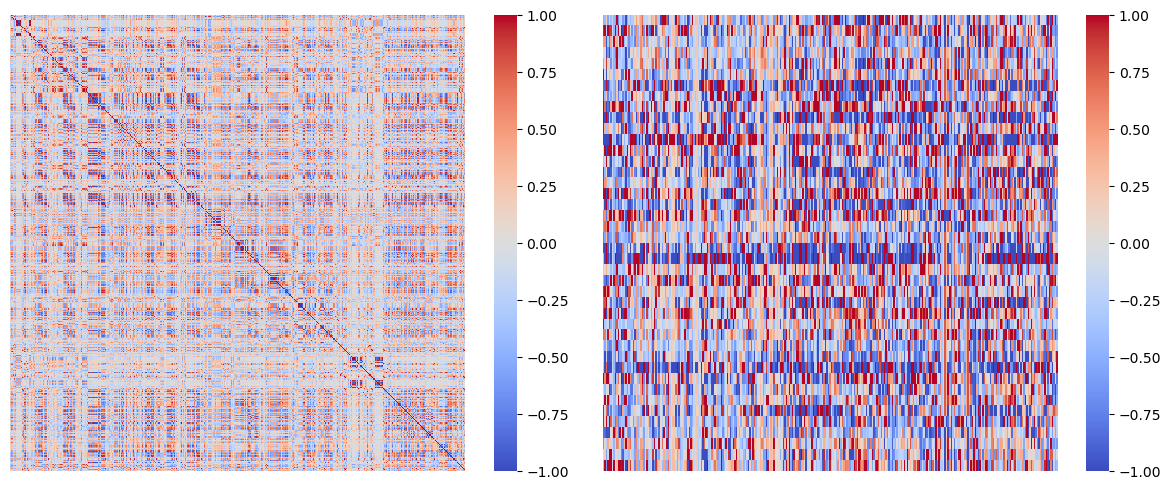

In [63]:
# 设置 matplotlib 的 figure 大小
plt.figure(figsize=(12, 5))  # 增加figure的宽度以容纳两个子图

# 绘制第一个热图
plt.subplot(1, 2, 1)  # 第一行，两列中的第一列
sns.heatmap(correlation_matrix, 
            annot=False,      # 去除注释
            cmap='coolwarm',  # 选择颜色
            vmin=-1, vmax=1,  # 设置颜色映射的最小值和最大值
            linewidths=0)    # 设置单元格之间分割线的宽度

plt.xticks([])  # 去除x轴刻度
plt.yticks([])  # 去除y轴刻度
plt.xlabel('')  # 去除x轴标签
plt.ylabel('')  # 去除y轴标签

# 绘制第二个热图
plt.subplot(1, 2, 2)  # 第一行，两列中的第二列
sns.heatmap(corr_filtered, 
            annot=False,      # 去除注释
            cmap='coolwarm',  # 选择颜色
            vmin=-1, vmax=1,  # 设置颜色映射的最小值和最大值
            linewidths=0)    # 设置单元格之间分割线的宽度

plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')

# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()

# 数据保存

## 输出路径

In [64]:
# 建立储存新文件的文件夹
path_output=r"D:\FJMU_course\Chapter_8\BraTs18\lecture_1"
try:
    os.mkdir(path_output)
except FileExistsError:
    print('Go Ahead!')
os.chdir(path_output)

Go Ahead!


## 数据集划分后

In [65]:
x_train.to_csv('x_train.csv')
y_train.to_csv('y_train.csv')
x_test.to_csv('x_test.csv')
y_test.to_csv('y_test.csv')

## 标准化后

In [66]:
df_transformed_train_data = pd.DataFrame(transformed_train_data, columns=x_train.columns, index=x_train.index)
df_transformed_test_data = pd.DataFrame(transformed_test_data, columns=x_test.columns, index=x_test.index)

In [67]:
df_transformed_train_data.to_csv('transformed_train_data.csv')
df_transformed_test_data.to_csv('transformed_test_data.csv')

## 特征间方差 & 相关性过滤后

In [71]:
corr_filtered.to_csv('var_corr_train_data.csv')